Lance Uy - 1006123570 - HW1

# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?



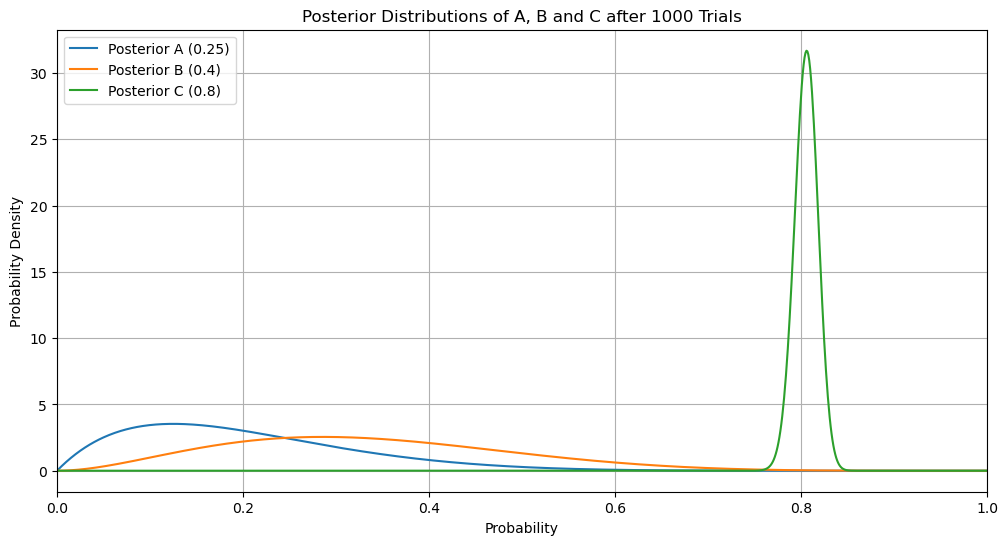

In [58]:
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt

# Set seed so results are consistent and reproducible
np.random.seed(1006123570);

# Declare variables for priors
# Number of trials
n = 1000 

# Alpha and beta values for priors, initially all 1
alpha_A, alpha_B, alpha_C = 1, 1, 1
beta_A, beta_B, beta_C = 1, 1, 1

# Declare fixed probabilities for A, B and C
prob_A, prob_B, prob_C = 0.25, 0.4, 0.8

# Create prior distributions for A, B, and C
prior_A = stats.beta(alpha_A, beta_A)
prior_B = stats.beta(alpha_B, beta_B)
prior_C = stats.beta(alpha_C, beta_C)


# Start algorithm and iterate over n times
for i in range(n):
    
    # Sample from the current posterior distributions
    sample_A = prior_A.rvs()
    sample_B = prior_B.rvs()
    sample_C = prior_C.rvs()

    # Choose arm based on exploration-exploitation strategy (0, 1, or 2)
    chosen_arm = np.argmax([sample_A, sample_B, sample_C])

    # Simulate the outcome based on the true probabilities (0 or 1)
    outcome = np.random.binomial(1, [prob_A, prob_B, prob_C][chosen_arm])
    
    # Update posterior distribution for the chosen arm
    if chosen_arm == 0: # A
        alpha_A = alpha_A + outcome
        beta_A = beta_A + 1 - outcome
        prior_A = stats.beta(alpha_A, beta_A)
    elif chosen_arm == 1: # B
        alpha_B = alpha_B + outcome
        beta_B = beta_B + 1 - outcome
        prior_B = stats.beta(alpha_B, beta_B)
    else: # C
        alpha_C = alpha_C + outcome
        beta_C = beta_C + 1 - outcome
        prior_C = stats.beta(alpha_C, beta_C)
            
# Plot results with additional details
plt.figure(figsize=(12, 6))
x = np.linspace(0, 1, 1000)
plt.plot(x, prior_A.pdf(x), label='Posterior A (Probability = 0.25)')
plt.plot(x, prior_B.pdf(x), label='Posterior B (Probability = 0.4)')
plt.plot(x, prior_C.pdf(x), label='Posterior C (Probability = 0.8)')

# Add labels and title
plt.xlabel('Probability')
plt.ylabel('Probability Density')
plt.title("Posterior Distributions of A, B and C after {} Trials".format(n))

# Set axis limits
plt.xlim(0, 1)

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

The data in this Bayesian Bandit simulation is simulated binary outcomes (0 or 1) based on the true probabilities of success for three different options (arms) labeled A, B, and C. The true probabilities are `prob_A = 0.25`, `prob_B = 0.4`, and `prob_C = 0.8`. In each iteration, the algorithm selects an arm based on a strategy that balances exploration and exploitation and observes the outcome (0 or 1).

The posterior updates are based on the observed outcomes for each arm. The Bayesian update for a Beta-distributed prior with parameters alpha and beta is performed using the formula: `alpha = alpha + outcome` and `beta = beta + 1 - outcome`. This update is applied separately for each arm A, B, and C after observing the outcome.

As shown from the graph above, after enough simulations the 3 distributions (A, B and C) which initially started as beta distributions with $\alpha = 1$ and $\beta = 1$ converged to their true theta values of 0.25, 0.4 and 0.8 respectively. Using this algorithm we are able to conclude that we should choose distribution C to exploit.